In [9]:
#Note: we only repeat this step from before, because this is a new .ipyb page.
#it only needs to be executed once per file.
#We'll import libraries as needed, but when submitting, having them all at the top is the best practice
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Reloading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

#Choosing sepal-length as the independent variable. 
X = df.drop(columns=['sepal-length']) #indpendent variables
y = df[['sepal-length']].copy() #dependent variables

#split the variable sets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
X_train_no_type = X_train.drop(columns = ['type'])
X_test_no_type =  X_test.drop(columns = ['type'])

#process categorical 'type' feature
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

from sklearn.linear_model import LinearRegression 

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred = linear_reg_model.predict(X_test)

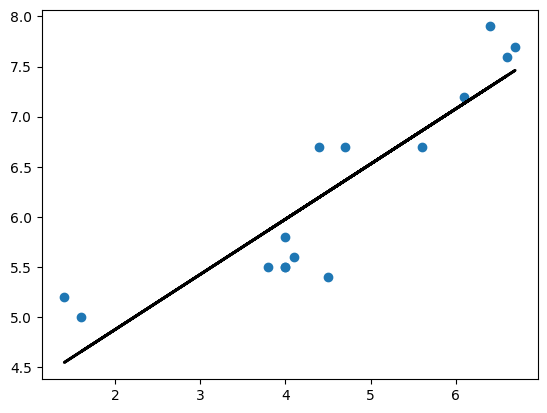

In [49]:
import matplotlib.pyplot as plt

x = X_train[['petal-length']]
x = x[-15:]
y = y_train[-15:]

# Create linear regression object
regr_ex = LinearRegression()
# Train the model using the training sets
regr_ex.fit(x, y)
y_pred_ex = regr_ex.predict(x)

fig, ax = plt.subplots()

plt.plot(x, y_pred_ex, color="black",linewidth=2);
plt.scatter(x, y)
# plt.scatter(x, y_pred_ex, color="blue")
# ax.set_xlabel('petal-length', fontsize=10)
# ax.set_ylabel('sepal-length', fontsize=10)


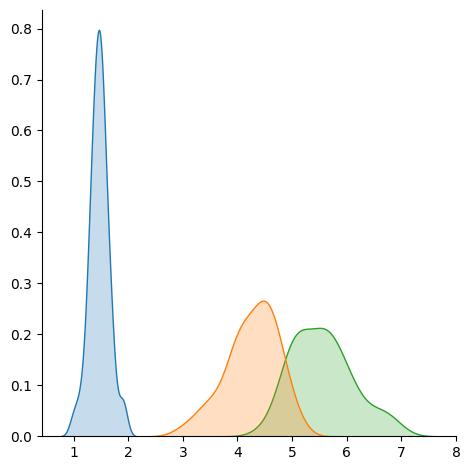

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df,x='petal-length', hue='type', kind ='kde', legend =False,fill=True).set_axis_labels('','');

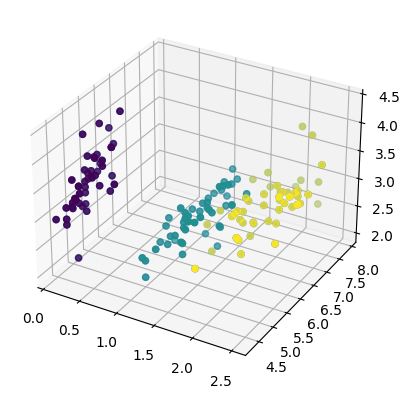

In [52]:
# df

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df['petal-width'],df['sepal-length'],df['sepal-width'])
ax.scatter(df['petal-width'],df['sepal-length'],df['sepal-width'], c=pd.factorize(df['type'])[0])
plt.show()



In [23]:

# from pandas import read_csv
# from IPython.display import display
from matplotlib import pyplot
import plotly.express as px
import plotly.io as pio
# pio.renderers.default='browser'

import pandas as pd
import numpy as np
# import pytorch
# import librosa
# import jinja2
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
#from sklearn import model_selection, linear_model, metrics, svm
# import seaborn as sn

# Load dataset
from pandas.plotting import scatter_matrix

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names=names) #reads csv into a dataframe
# print(df.info())
print(df['type'].unique())
# print(df.type.drop_duplicates())
# df['type'].value_counts().plot(kind='bar');

# #scatterplot
# scatter_matrix(df)
# pyplot.show()

# # histograms
# df.hist()
# pyplot.show()

df_three = df.iloc[:,:3]
# print(df_three)

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_three)
labels = y_predicted

km = KMeans(n_clusters=3)
km.fit(df_three)
# print(km.predict([[1,2,3]]))

# print(metrics.silhouette_score(df_three, labels, metric = 'euclidean'))
# print(y_predicted)


# fig  = px.scatter_3d(df_three, x='sepal-length', y='sepal-width', z='petal-length')
# fig.show()


dfa = px.data.iris()
fig = px.scatter_3d(dfa, x='sepal_length', y='sepal_width', z='petal_width',
              color='species',size = 'petal_length')
# fig.update_traces(marker_size = 5)
fig.show()


# train, test = model_selection.train_test_split(df, test_size=.2)
# X_train = train[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
# Y_train = train[['type']]
# X_test = test[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
# Y_test = test[['type']]
# split dataset
# X=df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].values
# y=df['type'].values
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3) #output are data frames

# # kfold = model_selection.StratifiedKFold(n_splits=10, random_state=1, shuffle=True)



['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\Users\ashej\.virtualenvs\jupyter-books-WZpnkDri\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ashej\.virtualenvs\jupyter-books-WZpnkDri\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



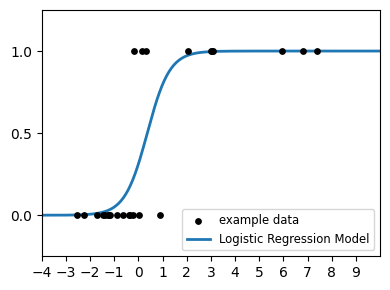

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = 0, 10
n_samples = 25
np.random.seed(3)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.5 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=10, s = 15)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", linewidth=2)

ols = LinearRegression()
ols.fit(X, y)
# plt.plot(
#     X_test,
#     ols.coef_ * X_test + ols.intercept_,
#     label="Linear Regression Model",
#     linewidth=1,
# )
# plt.axhline(0.5, color=".5")

# plt.ylabel("y")
# plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()